#Grupo 8:
- Mateo Aguirre Castrillon
- Alejandro Vargas Orozco
- Ricardo Calderon Garcia

#GENERADOR DE SEÑALES ALEATORIAS Y MEDIDOR DE DENSIDAD DE PROBABILIDAD

In [2]:
!pip install lcapy
!apt install texlive-latex-base
!apt-get install texlive-latex-extra
!apt-get update && apt-get install -y --no-install-recommends \
    texlive-fonts-recommended \
    texlive-latex-extra \
    texlive-fonts-extra \
    dvipng \
    lmodern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.0/410.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common
  texlive-base texlive-binaries xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
 

In [3]:
!pip install kde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#@title LIBRERIAS IMPORTADAS { run: "auto" }
## librerias para el funcionamiento del paquete

import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings("ignore", message="""Caught 'unbalanced parenthesis at position 119' compiling regex""", category=UserWarning )
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial
from scipy.stats import gaussian_kde
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
# Bin continuous data into intervals.
from sklearn.base import BaseEstimator, TransformerMixin
from numpy.lib.shape_base import apply_over_axes

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import os
import sys
import pandas as pd
# import pandas_datareader.data as web

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

from statsmodels.tsa import ar_model, arima_process, arima, arima_model
from statsmodels.tsa.ar_model import AutoReg
#!pip install numpy scipy patsy pandas
#!pip install statsmodels --upgrade

<ipython-input-4-d7672d71b644>:37: UserWarning: DelftStack
  warnings.warn('DelftStack')


0.00024415552707074406


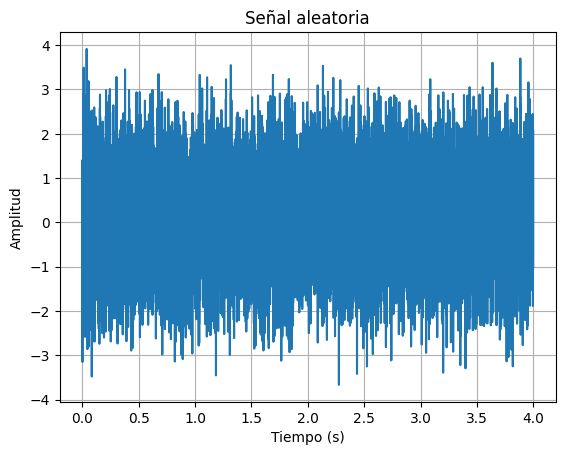

In [5]:
#Generador de señales
'''Importar librerias'''
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal aleatoria
amplitud = 1.0
media = 0.1
desviacion = 1.0
duracion = 4.0  # en segundos
tasa_muestreo = 4096  # número de muestras por segundo

# Crear el vector de tiempo
num_muestras = int(duracion * tasa_muestreo)
t = np.linspace(0, duracion, num_muestras)
tiempo_entre_puntos = duracion / (num_muestras - 1)
print(tiempo_entre_puntos)
# Generar la señal aleatoria
señal = amplitud * np.random.normal(loc=media, scale=desviacion, size=num_muestras)

# Visualizar la señal generada
plt.plot(t, señal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal aleatoria')
plt.grid(True)
plt.show()

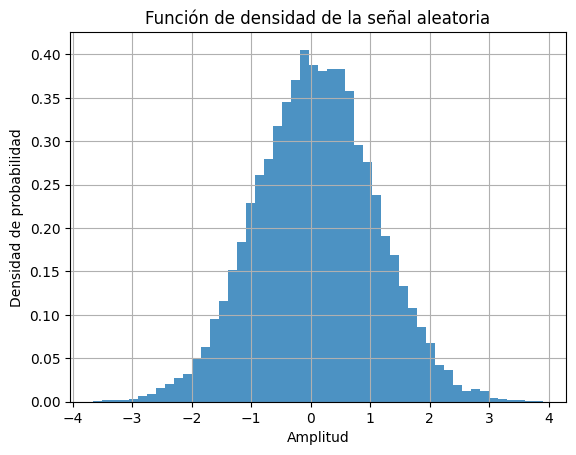

In [6]:
#Funcion de densidad
# Obtener el histograma de la señal aleatoria
num_bins = 50
hist, bins = np.histogram(señal, bins=num_bins, density=True)

# Visualizar el histograma
plt.hist(señal, bins=num_bins, density=True, alpha=0.8)
plt.xlabel('Amplitud')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de densidad de la señal aleatoria')
plt.grid(True)
plt.show()



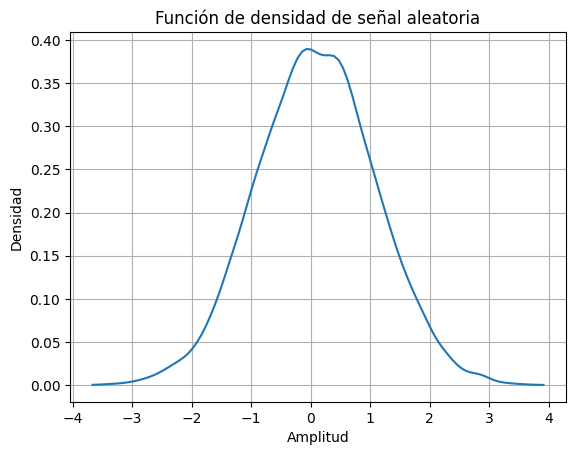

In [7]:


# Obtener la función de densidad de la señal generada
kde = gaussian_kde(señal)

# Crear el vector de amplitudes para graficar la función de densidad
min_amplitud = señal.min()
max_amplitud = señal.max()
amplitud = np.linspace(min_amplitud, max_amplitud, 100)

# Graficar la función de densidad
plt.plot(amplitud, kde(amplitud))
plt.xlabel('Amplitud')
plt.ylabel('Densidad')
plt.title('Función de densidad de señal aleatoria')
plt.grid(True)
plt.show()

#Estimacion de la media la desviacion estandar y la funcion de densidad de probabilidad

In [8]:
class KDE():

   """ 
  class in charge of managing the estimation by the non-parametric kernel method

  PARAMETERS
  -------------------------------------------------------------------
  X_function{np.array}--array with the information of the function to which 
                        we need to find its respective distribution function
  H{float}-- bandwidth

  Returns
  -----------------------------------------------------------------------
  None

   """
   def __init__(self,X_function:np.array, H:float=0.5):
     self.X_function=X_function
     self.H=H

   def Gaussian(self):

      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE GAUSSIAN

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None

      """
      self.kernel="gaussian"
      self.__fit()
   def Tophat(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE Tophat

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="tophat"
      self.__fit()
   def epanechnikov(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EPANECHNIKOV

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="epanechnikov"
      self.__fit()
   def exponential(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EXPONENTIAL

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="exponential"
      self.__fit()
   def linear(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE LINEAR

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="linear"
      self.__fit()
   def cosine(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE COSINE

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="cosine"
      self.__fit()
   def __fit(self):
      """
      FUNCTION THAT MAKE THE KERNEL ESTIMATION WITH A FIT ASOCIATE TO THE TYPE OF 
      THE KERNEL FUNCTION {SELF.KERNEL} AND THE DATA{SELF.X_FUNCTION}

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernelDensity=KernelDensity(kernel=self.kernel,bandwidth=self.H).fit(self.X_function.reshape(-1,1))
   def plot(self,X_plot:np.array,figure_size:tuple=(11,6)):
     """
      FUNCTION THAT COMPARE WITH A PLOT THE KERNEL ESTIMATION WITH THE HISTOGRAM
      OF THE SIGNAL.

      PARAMETERS
      -------------------------
      X_plot{np.array}--ARRAY WITH THE X-AXIS DID IT WITH NP.ARANGE(X_MIN,X_MAX,ESPACE)
      FIGURE_SIZE{TUPLE}: WITH THE SIZE OF THE GRAPHICS.

      RETURNS
      ----------------------------------
      None
      
     """

     try:
      X_plot=X_plot[:,np.newaxis]
      log_dens=self.kernelDensity.score_samples(X_plot)
      fig,ax=plt.subplots(figsize=figure_size)
      ax.plot(
          X_plot[:,0],np.exp(log_dens),color="red",label="Kernel"
      )
      
      ax.hist(self.X_function,density = True)
      plt.show()
     except AttributeError:
       print("YOU NEED TO DECIDE A TYPE OF KERNEL BEFORE....")
      

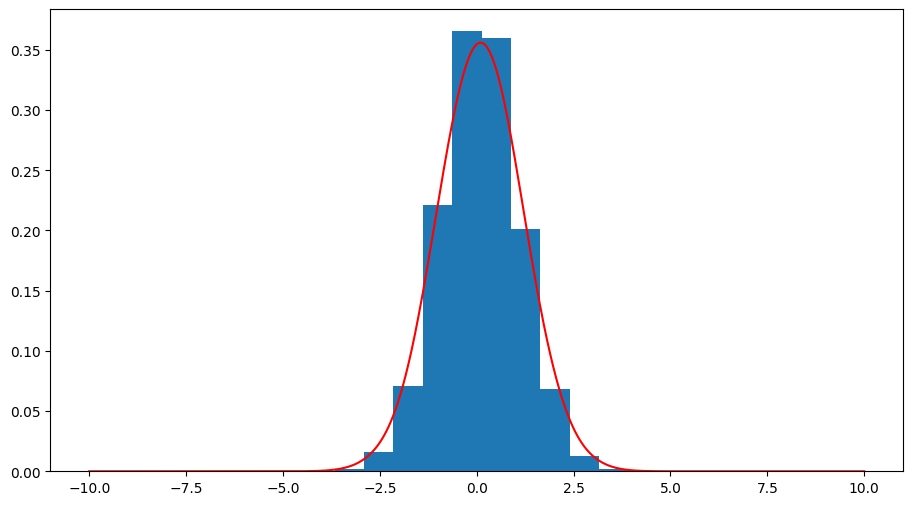

Media estimada: 0.09511971785545424
Desviación estándar estimada: 1.0024894515110931


In [9]:
if __name__=="__main__":
    #plt.hist(Señal_original,density=True)
    KERNEL=KDE(señal,H=0.5)
    KERNEL.Gaussian()
    KERNEL.plot(np.linspace(-10,10,1000))
# Calcular la media y la desviación estándar de la señal generada
media_estimada = np.mean(señal)
desv_estimada = np.std(señal)

print("Media estimada:", media_estimada)
print("Desviación estándar estimada:", desv_estimada)

#Calculo de transferencia y resouesta impulso

In [10]:
from lcapy import Circuit, j, omega, s

In [11]:
#LIBRERIAS PARA ANÁLISIS ESTADÍSTICO MATEMÁTICO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
import seaborn as sns ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

In [12]:
ctt = Circuit(
"""
Vi 1 0_1 step;down
C13 1 2; right, size=1.5
R13 2 0; down, size=1.5
W 0_1 0; right""")

#filtro pasa altos
ctt2 = Circuit(
"""
Vi 1 0_1 step;down
R13 1 2; right, size=1.5
C13 2 0; down, size=1.5
W 0_1 0; right""")

#pasa bajos
ctt4 = Circuit(
"""
Vi 1 0_1 step;down
C13 1 2; right, size=1.5
R13 2 0; down, size=1.5
W 0_1 0; right
R14 2 3; right, size=1.5
C14 3 4; down, size=1.5
W 0 4;right
""")


#filtro pasa bandas

In [13]:
H=(ctt2.C13.V(s)/ctt.Vi.V(s)).simplify()
H

      1      
─────────────
C₁₃⋅R₁₃⋅s + 1

In [14]:
C13=10e-9
R13=100000


In [15]:
H_valores=H.subs('C13',C13).subs('R13',R13)

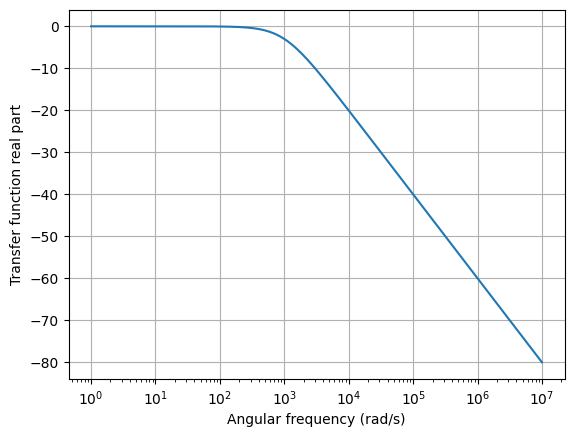

In [16]:
W=logspace(0,7,2000) ##GENERAMOS VECTOR DE FRECUENCIAS
X=H_valores(j*omega).dB.plot(W,log_frequency=True)

In [17]:
##USANDO LTI PARA SIMULAR EN EL TIEMPO
Coeficientes_num=[1]
Coeficientes_dem=[C13*R13, 1]
Coeficientes_dem

/usr/local/lib/python3.10/dist-packages/lcapy/schematic.py:593: UserWarning: Have circuitikz version 1.0; should upgrade to 1.4.5 or later
  warn('Have circuitikz version %s; should upgrade to %s or later'


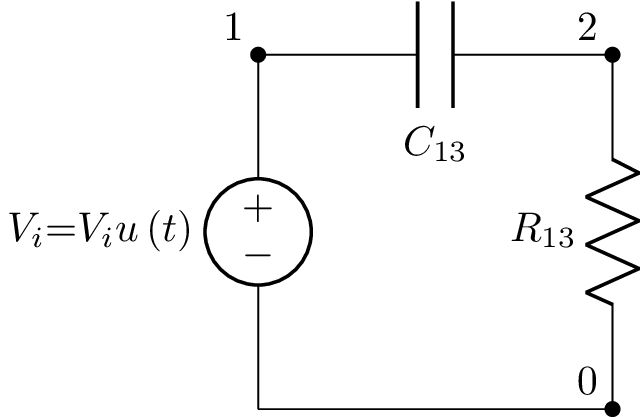

In [18]:
ctt.draw()

/usr/local/lib/python3.10/dist-packages/lcapy/schematic.py:593: UserWarning: Have circuitikz version 1.0; should upgrade to 1.4.5 or later
  warn('Have circuitikz version %s; should upgrade to %s or later'


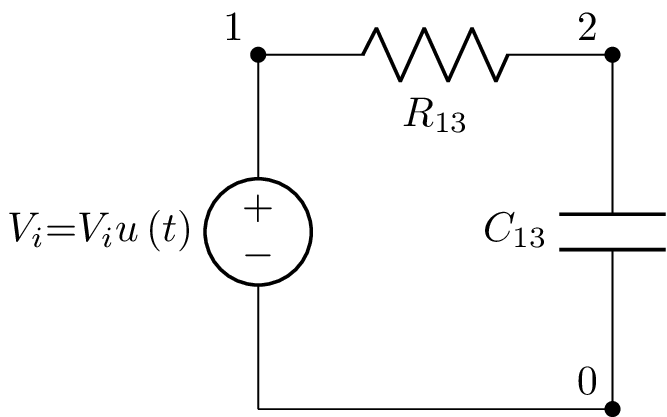

In [19]:
ctt2.draw()

/usr/local/lib/python3.10/dist-packages/lcapy/schematic.py:593: UserWarning: Have circuitikz version 1.0; should upgrade to 1.4.5 or later
  warn('Have circuitikz version %s; should upgrade to %s or later'


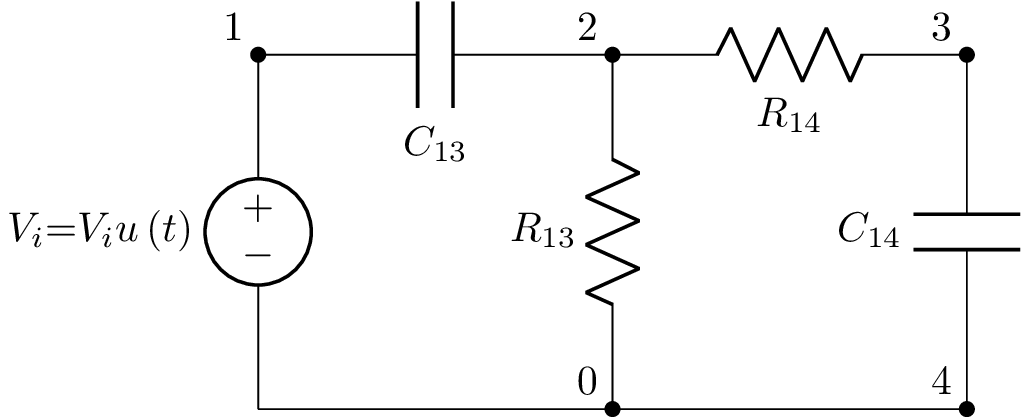

In [20]:
ctt4.draw()

In [21]:
lti_system=lti(Coeficientes_num, Coeficientes_dem) ##SIMULANDO SISTEMA SLIT CON LA ECUACIÓN
Nsample=int(len(señal)) ##DIFINIENDO NÚMERO DE MUESTRAS
t,h=lti_system.impulse(N=Nsample) #OBTENIENDO RESPUESTA AL IMPULSO

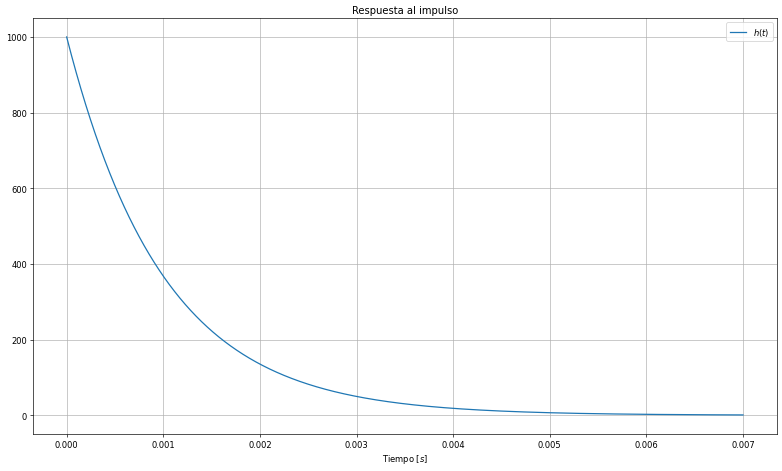

In [22]:
plt.figure(figsize=(16,9), dpi=60)
plt.plot(t,h,label='$h(t)$')
plt.grid(True)
plt.legend()
plt.title('Respuesta al impulso')
plt.xlabel("Tiempo [$s$]")
plt.show()

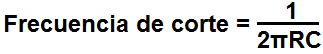

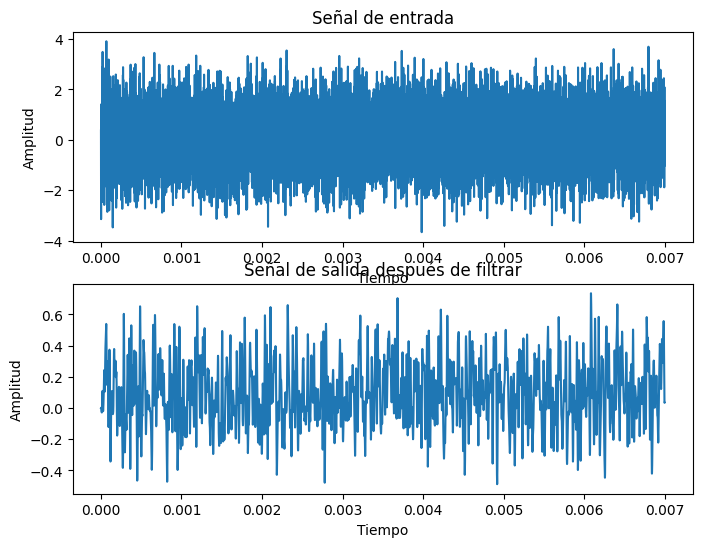

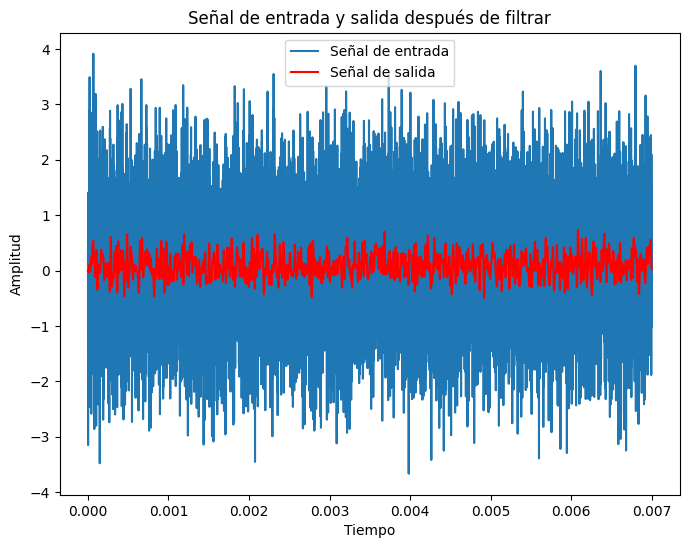

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

nyq = num_muestras / 4 # frecuencia de Nyquist
cutoff_freq = 1/(2*np.pi*R13*C13)  # frecuencia de corte del filtro
cutoff = cutoff_freq / nyq
b, a = butter(4, cutoff, btype='low')

# Aplicamos el filtro a la señal de entrada
signal_out = lfilter(b, a, señal)

# Graficamos la señal de entrada y salida
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t, señal)
ax[0].set_title('Señal de entrada')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[1].plot(t, signal_out)
ax[1].set_title('Señal de salida después de filtrar')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Amplitud')
plt.figure(figsize=(8, 6))
plt.plot(t, señal, label='Señal de entrada')
plt.plot(t, signal_out, label='Señal de salida', color='red')
plt.title('Señal de entrada y salida después de filtrar')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()



# PRGUNTA DISTRIBUCIONES UNFORMES


Media de la combinación: 6.0
Media funcion 1: 5.0
Media funcion 2: 12.5


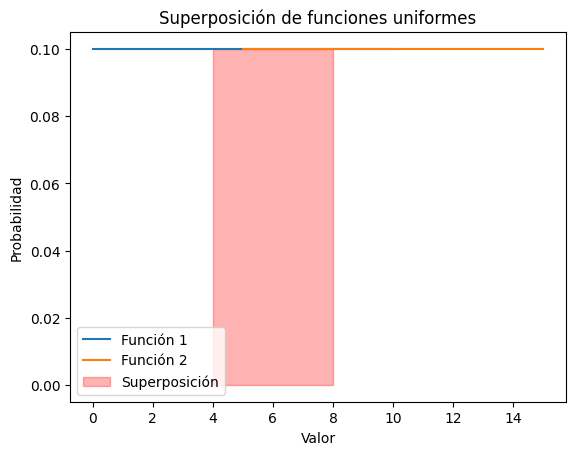

In [24]:
a = 0  # Límite inferior de la primera función uniforme
b = 10  # Límite superior de la primera función uniforme
c = 5  # Límite inferior de la segunda función uniforme
d = 15  # Límite superior de la segunda función uniforme
e = 4  # Límite inferior del intervalo de superposición
f = 8  # Límite superior del intervalo de superposición

# Cálculo de la media de la combinación
p1 = (f - e) / (b - a)  # Probabilidad relativa de la primera función en la región de superposición
p2 = (f - e) / (d - c)  # Probabilidad relativa de la segunda función en la región de superposición
media_combinacion = p1 * (a + b) / 2 + p2 * (c + d) / 2

print("Media de la combinación:", media_combinacion)
print("Media funcion 1:",(a+b/2))
print("Media funcion 2:",(c+d/2))

# Generación de datos para graficar las funciones
x1 = np.linspace(a, b, 1000)
y1 = np.full_like(x1, 1 / (b - a))
x2 = np.linspace(c, d, 1000)
y2 = np.full_like(x2, 1 / (d - c))

# Graficar las funciones y la combinación
plt.plot(x1, y1, label='Función 1')
plt.plot(x2, y2, label='Función 2')
plt.fill_between([e, f], [0, 0], [1 / (b - a), 1 / (b - a)], alpha=0.3, color='red', label='Superposición')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Superposición de funciones uniformes')
plt.legend()
plt.show()

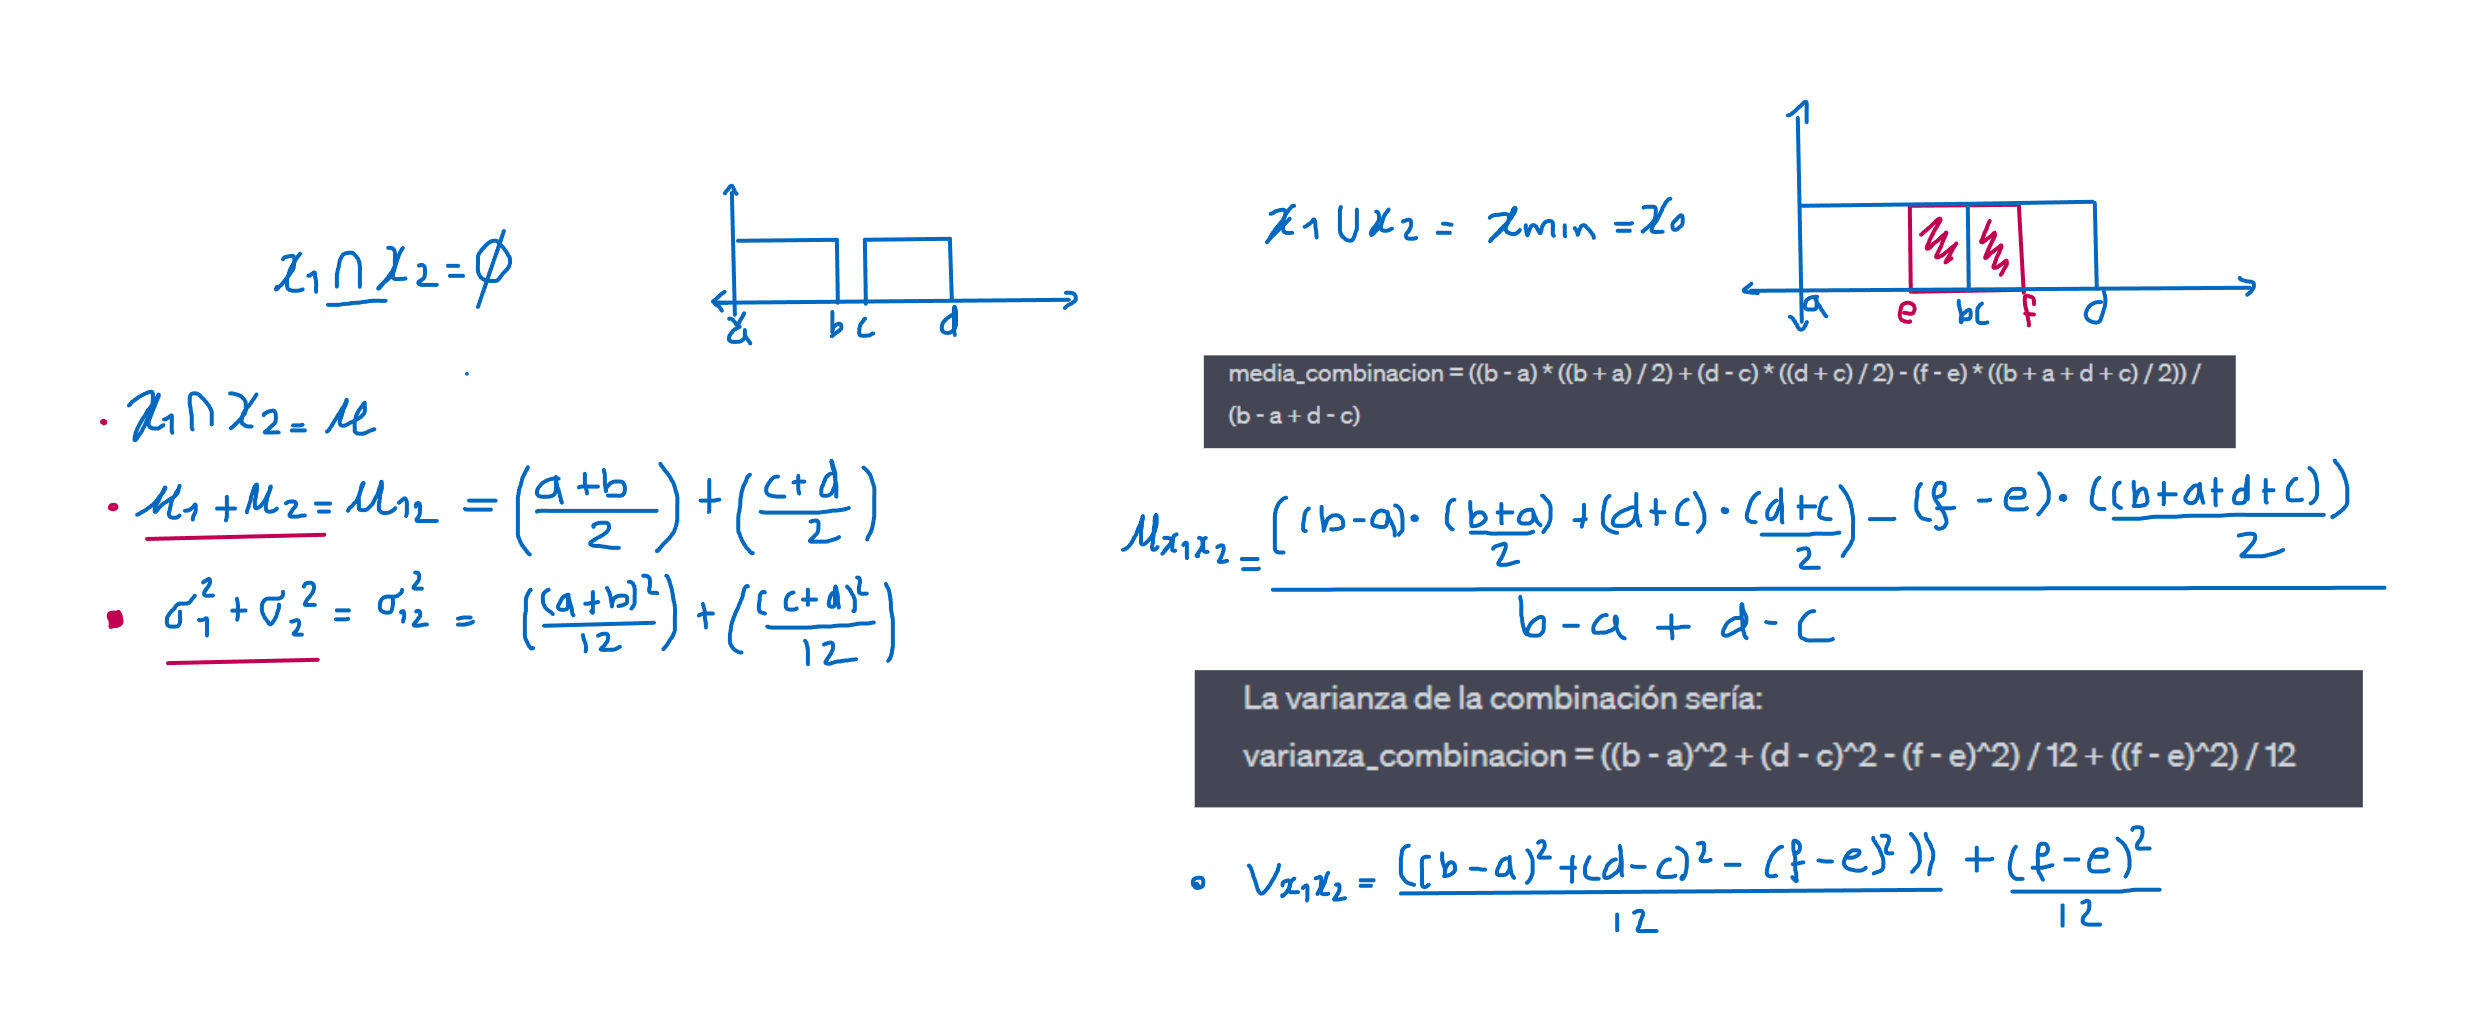

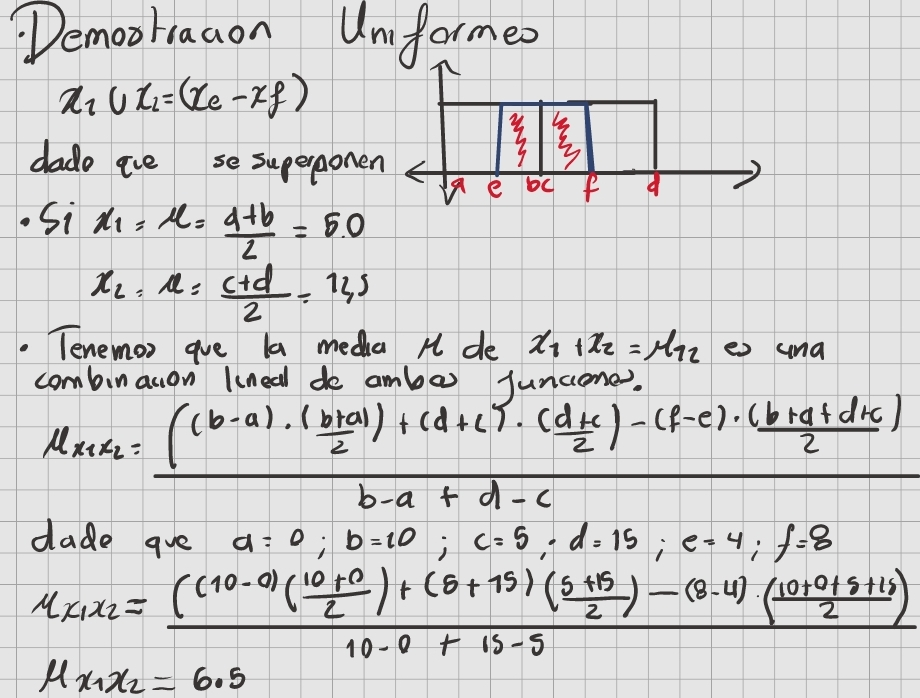

#Calculo teorico

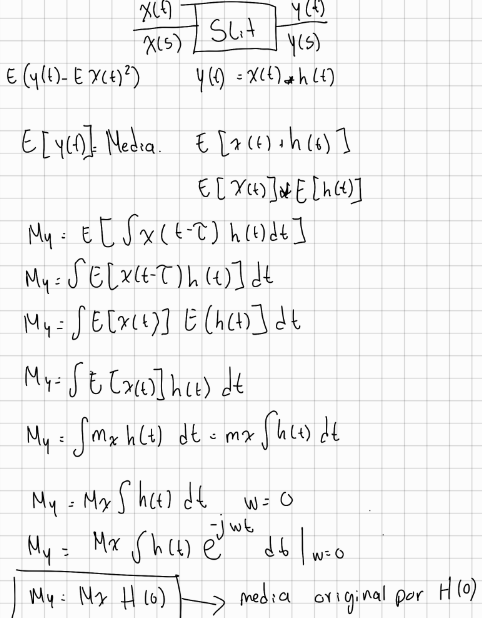

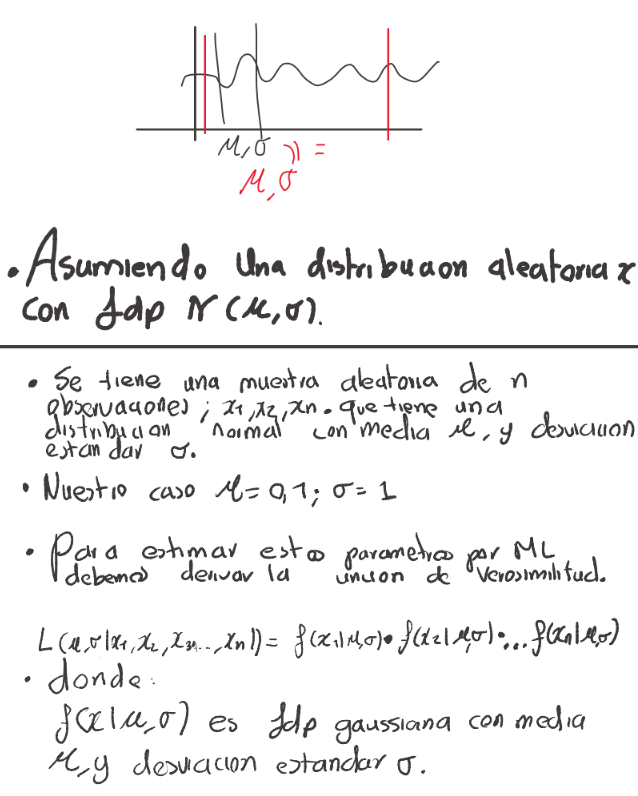

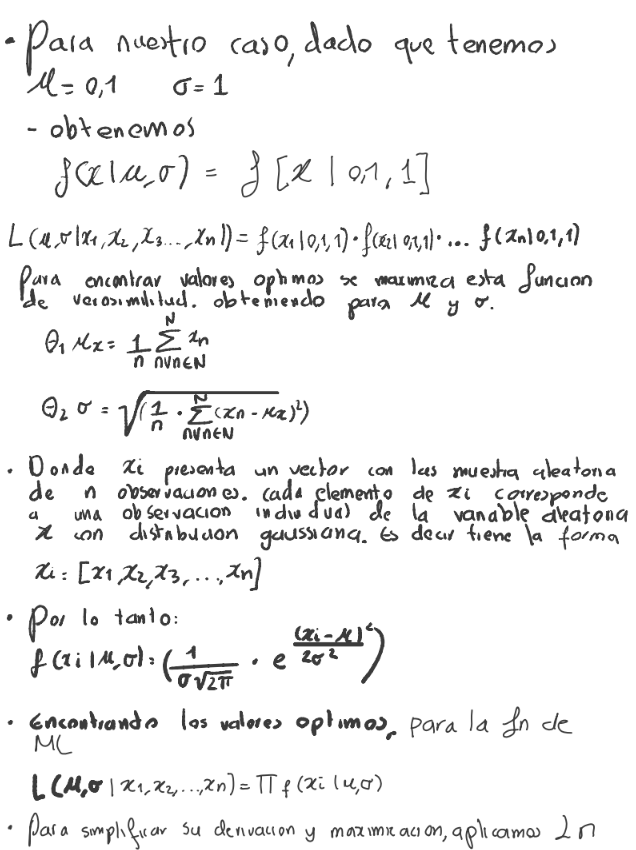

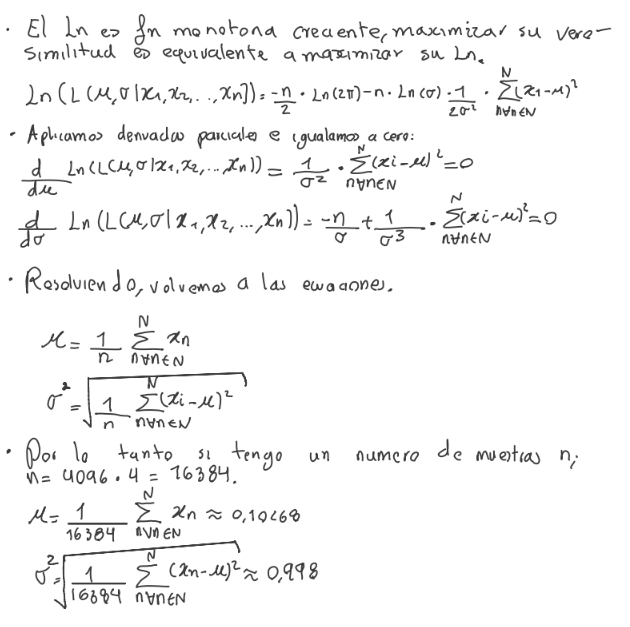

#Parte 2


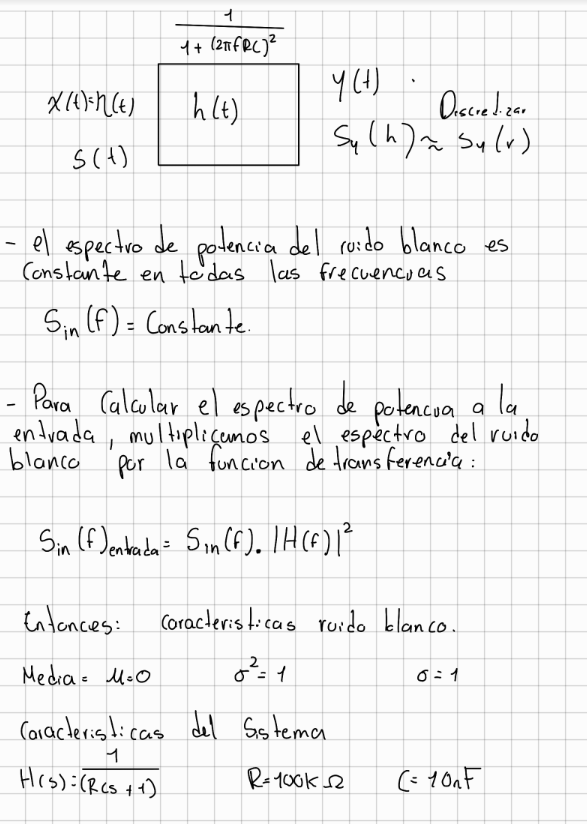

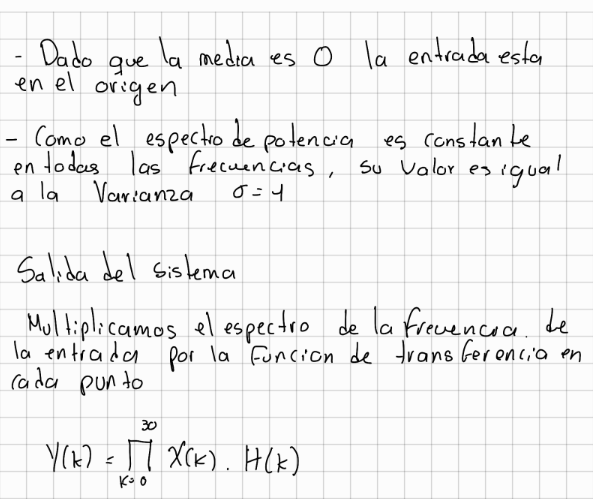

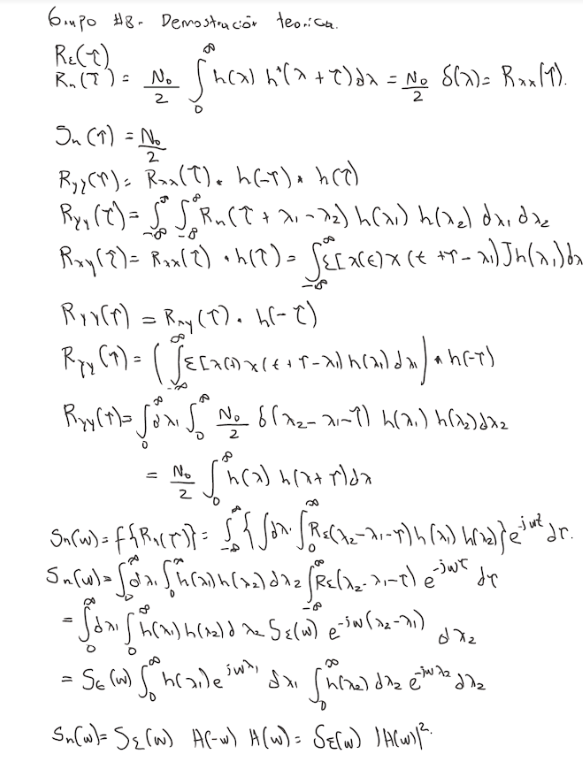

Varianza: 0.9856188592867592
Desviación estándar: 1.0134312758696786


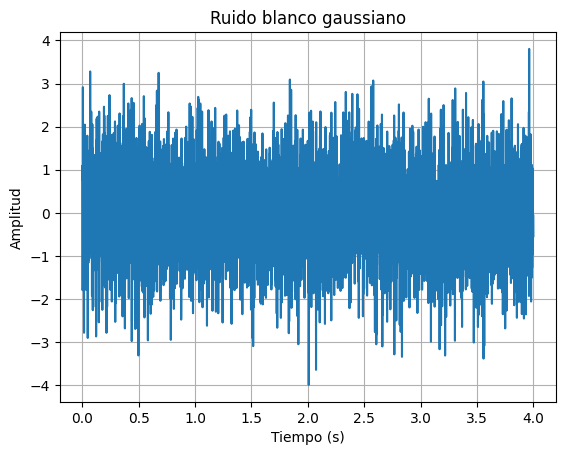

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal aleatoria
duracion = 10  # en segundos
tasa_muestreo = 3023  # número de muestras por segundo

# Crear el vector de tiempo
num_muestras = int(duracion * tasa_muestreo)
t = np.linspace(0, duracion, num_muestras)

# Generar la señal de ruido blanco gaussiano
np.random.seed(0)  # Para reproducibilidad
señal2 = np.random.normal(0, 1, num_muestras)
# Calcular la varianza
varianza = np.var(señal2)

media=-0
sd=1
Fdisc=62.5*20
Tdisc=1/Fdisc
señal2=np.random.normal(media,sd,size=5000)
t = np.arange(0, 4, Tdisc)
# Calcular la desviación estándar
desviacion_estandar = np.std(señal2)

print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)
# Visualizar la señal generada
plt.plot(t, señal2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ruido blanco gaussiano')
plt.grid(True)
plt.show()


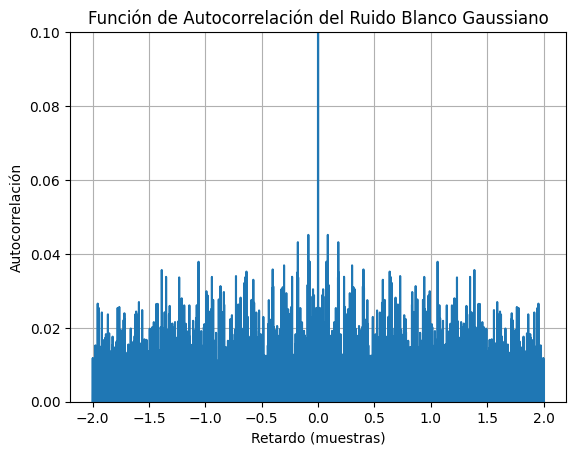

In [26]:

# Calcular la función de autocorrelación
autocorrelacion = np.correlate(señal2, señal2, mode='same')
autocorrelacion /= np.max(autocorrelacion)

# Crear el vector de tiempo para la autocorrelación
#t_autocorrout = np.linspace(-duracion, duracion, num_muestras)

# Visualizar la función de autocorrelación
plt.plot(t-2,autocorrelacion)
plt.xlabel('Retardo (muestras)')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación del Ruido Blanco Gaussiano')
plt.grid(True)
#plt.xlim(0, 1)  # Limitar el rango del eje x para visualizar mejor el impulso
plt.ylim(0,0.1)
plt.show()



In [27]:
indice = 10  # Índice deseado

valor_autocorr = autocorrelacion[indice]

print("Valor de autocorrelación en el índice", indice, ":", valor_autocorr)

Valor de autocorrelación en el índice 10 : -0.013953388657318587


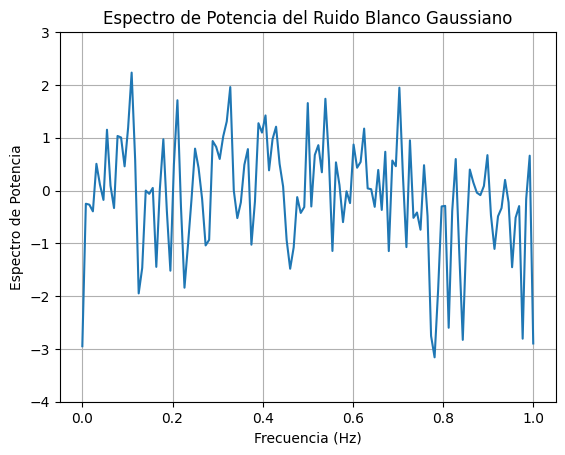

5135.593752314069


In [28]:
# Calcular la transformada de Fourier y el espectro de potencia
espectro = np.abs(np.fft.fft(señal2))**2
frecuencias = np.fft.fftfreq(num_muestras, 1/tasa_muestreo)

# Visualizar el espectro de potencia
plt.psd(señal2)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del Ruido Blanco Gaussiano')
plt.grid(True)
plt.show()
promedio = np.mean(espectro)
print(promedio)

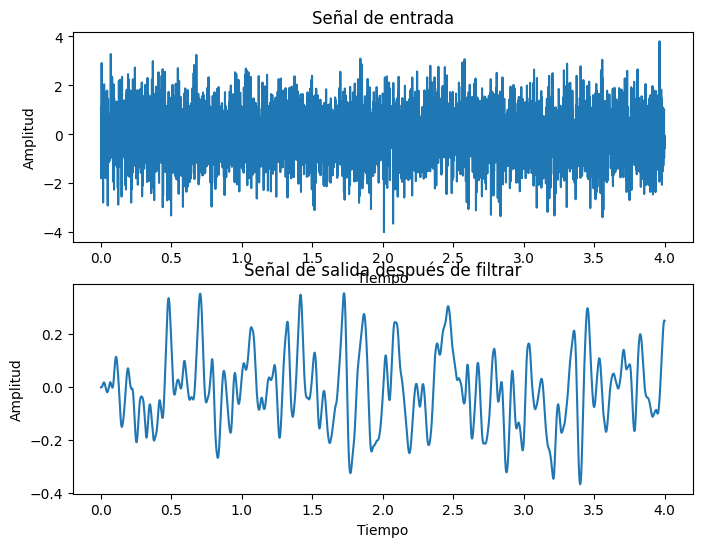

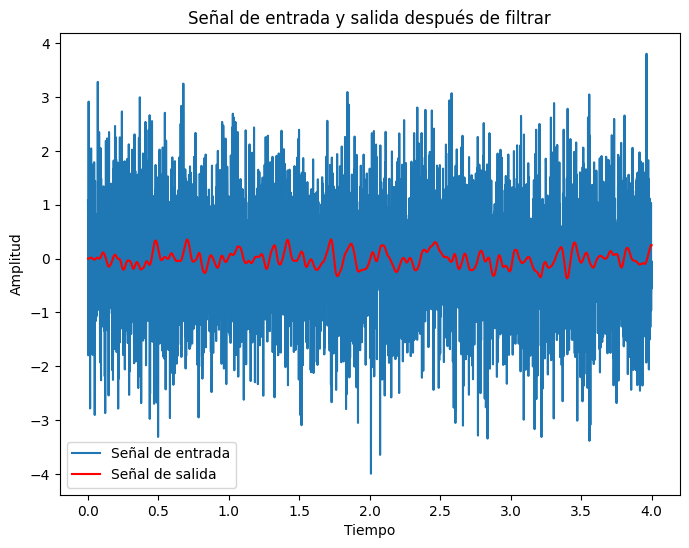

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

nyq = num_muestras / 4 # frecuencia de Nyquist
cutoff_freq = 1/(2*np.pi*R13*C13)  # frecuencia de corte del filtro
cutoff = cutoff_freq / nyq
b, a = butter(4, cutoff, btype='low')

# Aplicamos el filtro a la señal de entrada
signal_out2 = lfilter(b, a, señal2)

# Graficamos la señal de entrada y salida
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t, señal2)
ax[0].set_title('Señal de entrada')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[1].plot(t, signal_out2)
ax[1].set_title('Señal de salida después de filtrar')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Amplitud')
plt.figure(figsize=(8, 6))
plt.plot(t, señal2, label='Señal de entrada')
plt.plot(t, signal_out2, label='Señal de salida', color='red')
plt.title('Señal de entrada y salida después de filtrar')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


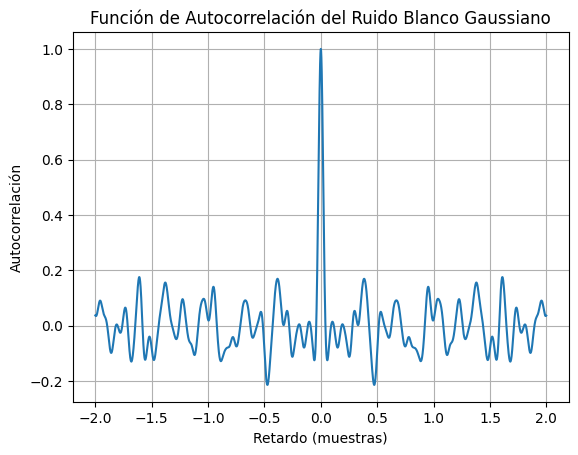

In [30]:
# Calcular la función de autocorrelación
autocorrelacionout2 = np.correlate(signal_out2, signal_out2, mode='same')
autocorrelacionout2 /= np.max(autocorrelacionout2)

# Crear el vector de tiempo para la autocorrelación
#t_autocorrout = np.linspace(-duracion, duracion, num_muestras)

# Visualizar la función de autocorrelación
plt.plot(t-2,autocorrelacionout2)
plt.xlabel('Retardo (muestras)')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación del Ruido Blanco Gaussiano')
plt.grid(True)
#plt.xlim(0, 1)  # Limitar el rango del eje x para visualizar mejor el impulso
#plt.ylim(0,0.1)
plt.show()

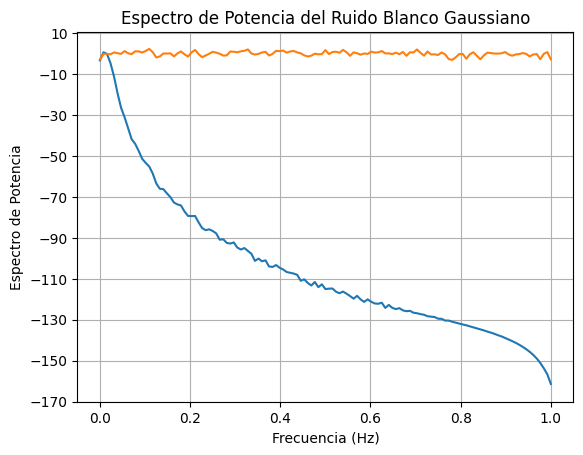

100.05317237532437


In [31]:
# Calcular la transformada de Fourier y el espectro de potencia
espectroout = np.abs(np.fft.fft(signal_out2))**2
frecuencias = np.fft.fftfreq(num_muestras, 1/tasa_muestreo)

# Visualizar el espectro de potencia
plt.psd(signal_out2)
plt.psd(señal2)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del Ruido Blanco Gaussiano')
plt.grid(True)
plt.show()
promedio = np.mean(espectroout)
print(promedio)

# SEÑAL COSENO Y COSENO SUMADO CON RBG


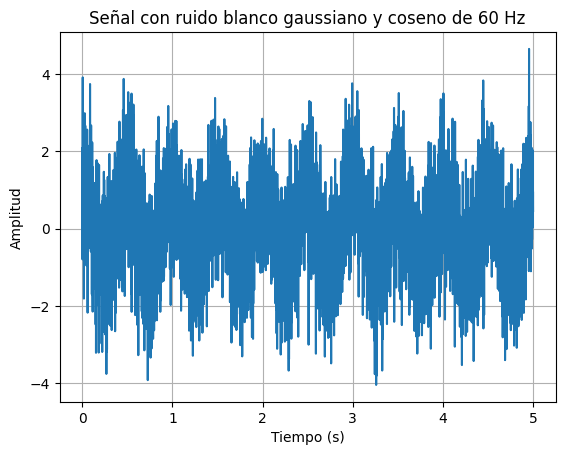

In [32]:
# Parámetros de la señal coseno
frecuencia = 2  # Hz
duracion = 5  # segundos
tasa_muestreo = 1000  # número de muestras por segundo

# Crear el vector de tiempo
num_muestras = int(duracion * tasa_muestreo)
t = np.linspace(0, duracion, num_muestras)

# Generar la señal coseno
señal_coseno = np.cos(2 * np.pi * frecuencia * t)

# Sumar la señal coseno con el ruido blanco gaussiano
señal_final = señal_coseno + señal2

# Visualizar la señal final
plt.plot(t, señal_final)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal con ruido blanco gaussiano y coseno de 60 Hz')
plt.grid(True)
plt.show()

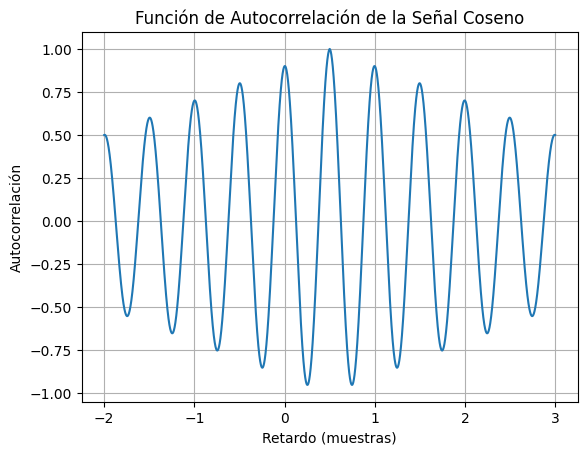

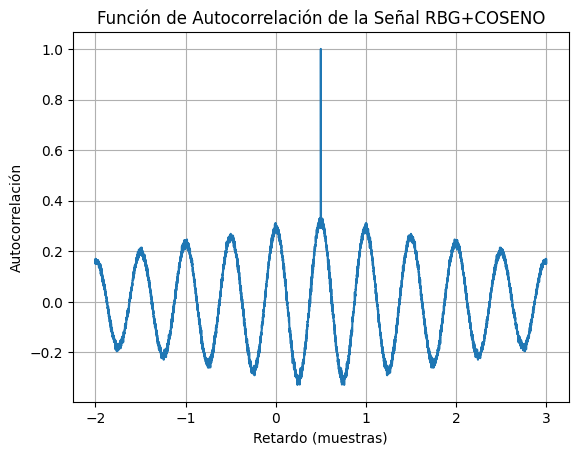

In [33]:
'''AUTO CORRELACION COSENO Y COSENO + RBG'''

# Calcular la autocorrelación de la señal coseno sin ventana
autocorrelacioncos = np.correlate(señal_coseno, señal_coseno, mode='same')
autocorrelacioncos /= np.max(autocorrelacioncos)
#rbg+cos
autocorrelacionRBC = np.correlate(señal_final, señal_final, mode='same')
autocorrelacionRBC /= np.max(autocorrelacionRBC)
# Visualizar la función de autocorrelación
plt.plot(t-2,autocorrelacioncos)
plt.xlabel('Retardo (muestras)')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación de la Señal Coseno')
plt.grid(True)
plt.show()
plt.plot(t-2,autocorrelacionRBC)
plt.xlabel('Retardo (muestras)')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación de la Señal RBG+COSENO')
plt.grid(True)
#plt.ylim(0,0.001)
plt.show()

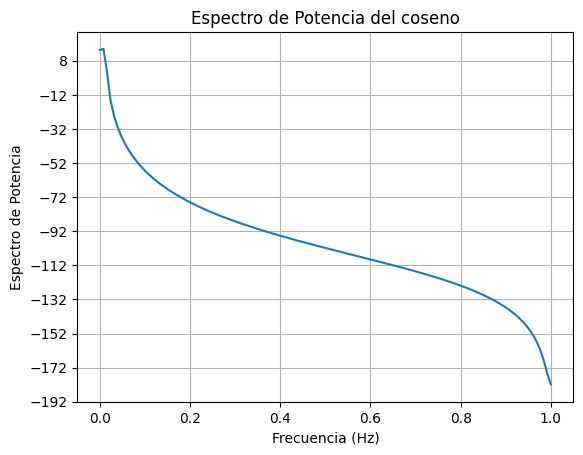

2500.5000000000005


In [41]:
# Calcular la transformada de Fourier y el espectro de potencia
espectrocos = np.abs(np.fft.fft(señal_coseno))**2
frecuencias = np.fft.fftfreq(num_muestras, 1/tasa_muestreo)

# Visualizar el espectro de potencia
plt.psd(señal_coseno)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del coseno')
plt.grid(True)
plt.show()
promedio = np.mean(espectrocos)
print(promedio)

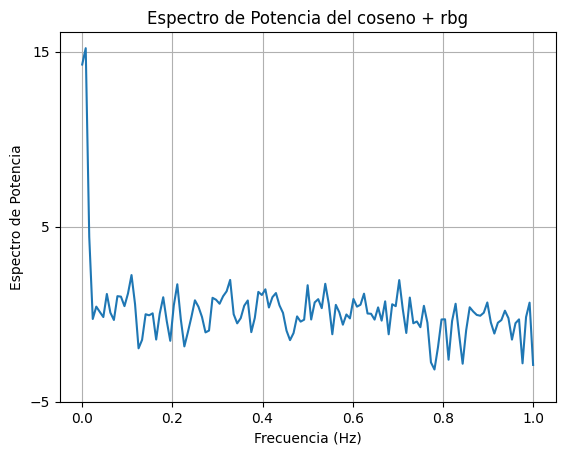

7578.096646003469


In [42]:
# Calcular la transformada de Fourier y el espectro de potencia
espectrocosRBG = np.abs(np.fft.fft(señal_final))**2
frecuencias = np.fft.fftfreq(num_muestras, 1/tasa_muestreo)

# Visualizar el espectro de potencia
plt.psd(señal_final)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del coseno + rbg')
plt.grid(True)
plt.show()
promedio = np.mean(espectrocosRBG)
print(promedio)

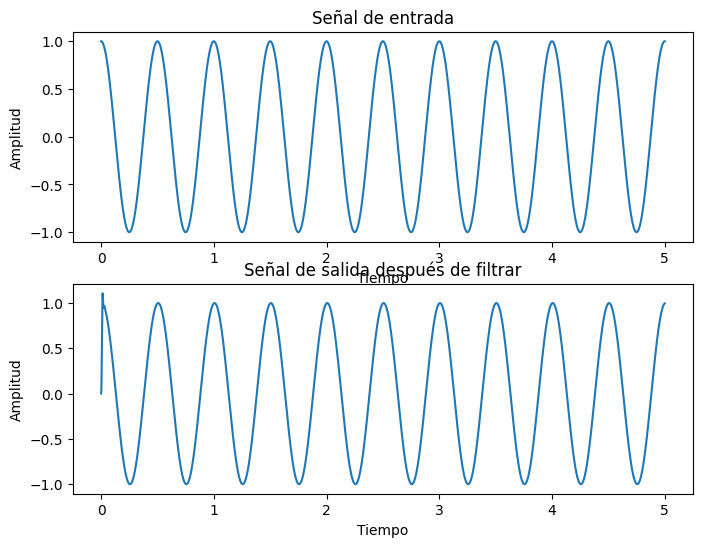

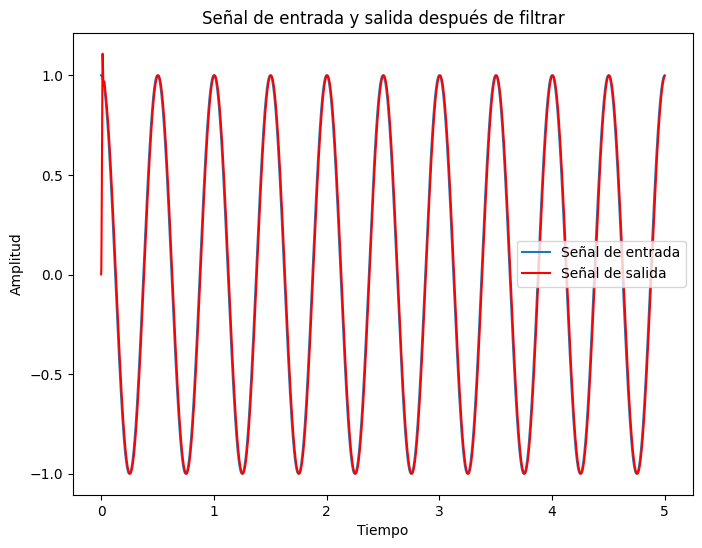

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

nyq = num_muestras / 4 # frecuencia de Nyquist
cutoff_freq = 1/(2*np.pi*R13*C13)  # frecuencia de corte del filtro
cutoff = cutoff_freq / nyq
b, a = butter(4, cutoff, btype='low')

# Aplicamos el filtro a la señal de entrada
signal_outt = lfilter(b, a, señal_coseno)

# Graficamos la señal de entrada y salida
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t, señal_coseno)
ax[0].set_title('Señal de entrada')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[1].plot(t, signal_outt)
ax[1].set_title('Señal de salida después de filtrar')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Amplitud')
plt.figure(figsize=(8, 6))
plt.plot(t, señal_coseno, label='Señal de entrada')
plt.plot(t, signal_outt, label='Señal de salida', color='red')
plt.title('Señal de entrada y salida después de filtrar')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


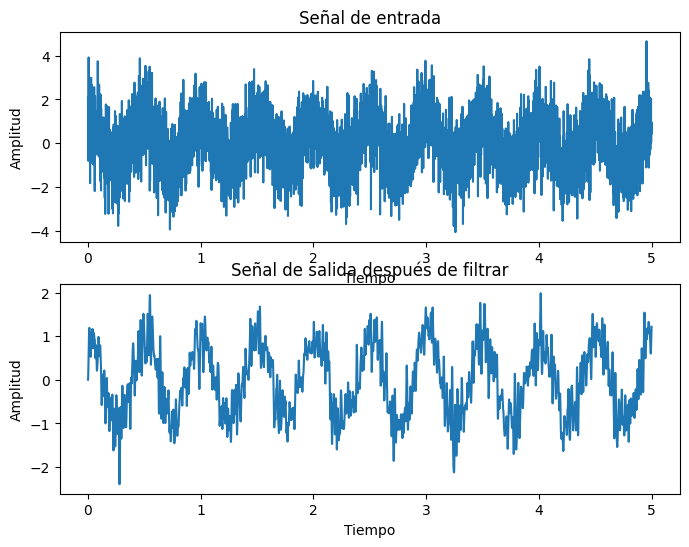

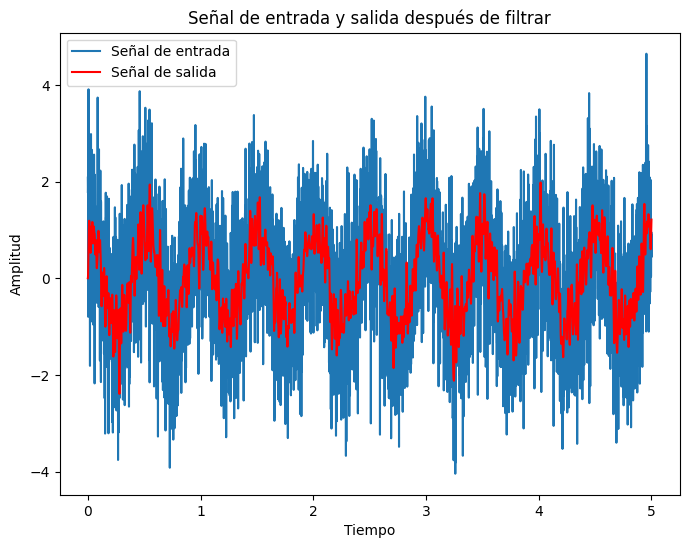

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

nyq = num_muestras / 4 # frecuencia de Nyquist
cutoff_freq = 1/(2*np.pi*R13*C13)  # frecuencia de corte del filtro
cutoff = cutoff_freq / nyq
b, a = butter(4, cutoff, btype='low')

# Aplicamos el filtro a la señal de entrada
signal_out3 = lfilter(b, a, señal_final)

# Graficamos la señal de entrada y salida
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t,  señal_final)
ax[0].set_title('Señal de entrada')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')
ax[1].plot(t, signal_out3)
ax[1].set_title('Señal de salida después de filtrar')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Amplitud')
plt.figure(figsize=(8, 6))
plt.plot(t,  señal_final, label='Señal de entrada')
plt.plot(t, signal_out3, label='Señal de salida', color='red')
plt.title('Señal de entrada y salida después de filtrar')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


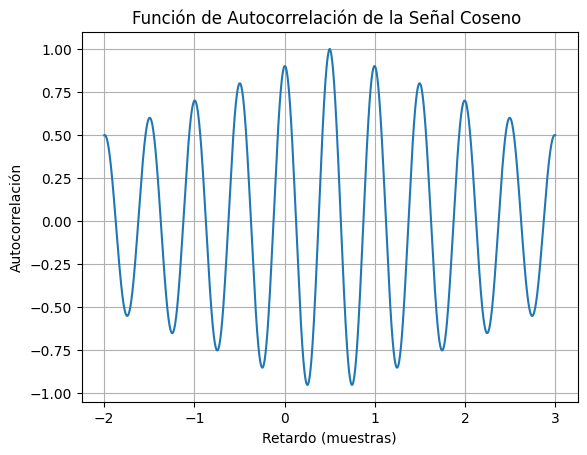

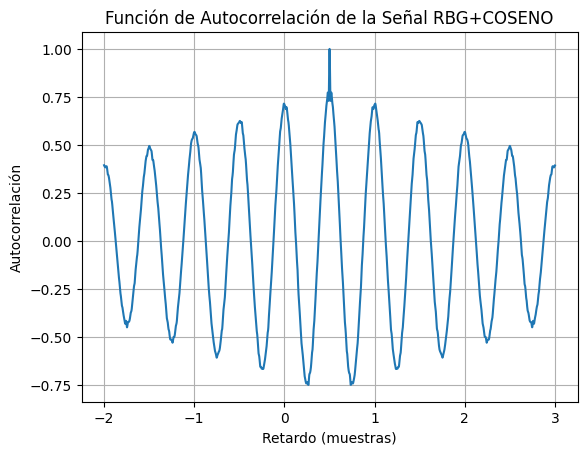

In [36]:
'''AUTO CORRELACION COSENO Y COSENO + RBG'''

# Calcular la autocorrelación de la señal coseno sin ventana
autocorrelacioncosout = np.correlate(signal_outt, signal_outt, mode='same')
autocorrelacioncosout /= np.max(autocorrelacioncosout)

#rbg+cos salida
autocorrelacionRBCout = np.correlate(signal_out3, signal_out3, mode='same')
autocorrelacionRBCout /= np.max(autocorrelacionRBCout)
# Visualizar la función de autocorrelación
plt.plot(t-2,autocorrelacioncosout)
plt.xlabel('Retardo (muestras)')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación de la Señal Coseno ')
plt.grid(True)
plt.show()
plt.plot(t-2,autocorrelacionRBCout)
plt.xlabel('Retardo (muestras)')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación de la Señal RBG+COSENO')
#plt.ylim(-0.75,10)
plt.grid(True)
plt.show()

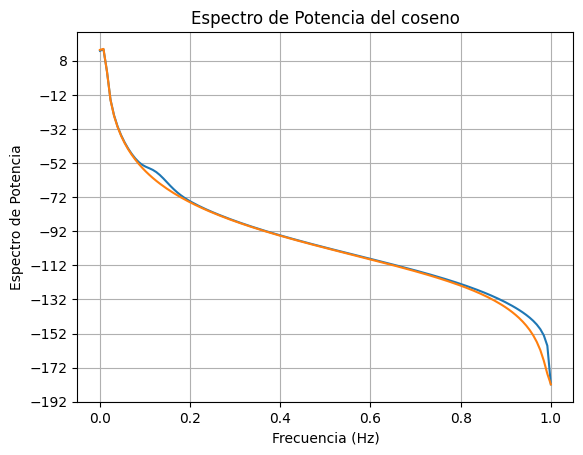

100.05317237532437


In [39]:
# Calcular la transformada de Fourier y el espectro de potencia
espectrooutcos = np.abs(np.fft.fft(signal_outt))**2
frecuencias = np.fft.fftfreq(num_muestras, 1/tasa_muestreo)

# Visualizar el espectro de potencia
plt.psd(signal_outt)
plt.psd(señal_coseno)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del coseno')
plt.grid(True)
plt.show()
promedio = np.mean(espectrooutcos)
print(promedio)

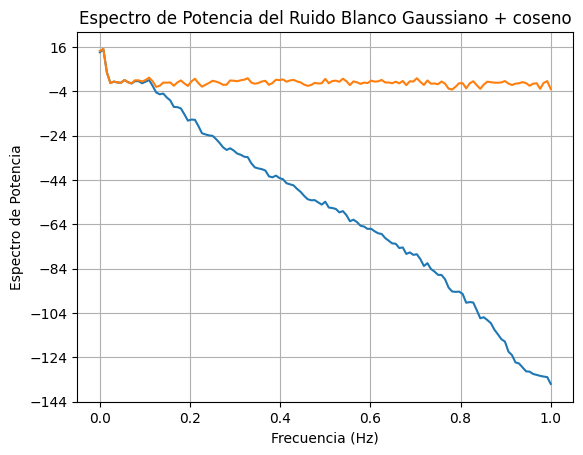

100.05317237532437


In [40]:
# Calcular la transformada de Fourier y el espectro de potencia
espectrooutRBG = np.abs(np.fft.fft(signal_out3))**2
frecuencias = np.fft.fftfreq(num_muestras, 1/tasa_muestreo)

# Visualizar el espectro de potencia
plt.psd(signal_out3)
plt.psd(señal_final)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del Ruido Blanco Gaussiano + coseno')
plt.grid(True)
plt.show()
promedio = np.mean(espectrooutRBG)
print(promedio)